{'t': array([ 0. ,  0.5,  1. , ..., 48.5, 49. , 49.5], dtype=float32), 'K': array([0.10893833, 0.10893833, 0.10893833, ..., 0.08391953, 0.08391953,
       0.08391953], dtype=float32), 'V': array([0.1176223 , 0.1176223 , 0.1176223 , ..., 0.00981751, 0.00981751,
       0.00981751], dtype=float32), 'U': array([0.30713347, 0.30713347, 0.30713347, ..., 0.92351586, 0.92351586,
       0.92351586], dtype=float32), 'true_x1': array([ 0.307133,  0.130955,  0.028474, ...,  0.540145,  0.171573,
       -0.096669], dtype=float32), 'true_w': array([0.117622, 0.112859, 0.10548 , ..., 0.159942, 0.155078, 0.142972],
      dtype=float32), 'pred_x1': array([0.3028142 , 0.13997318, 0.03966596, ..., 0.46659   , 0.3673588 ,
       0.27081555], dtype=float32), 'pred_w': array([0.11508787, 0.1190573 , 0.110199  , ..., 0.14517118, 0.14037034,
       0.13494827], dtype=float32)}
(500000,)
max e(rr region:  0.10188900679349899 0.4633362591266632 0.1178983598947525 38.5
max err 0.6797774881124496
mean err 0.002939

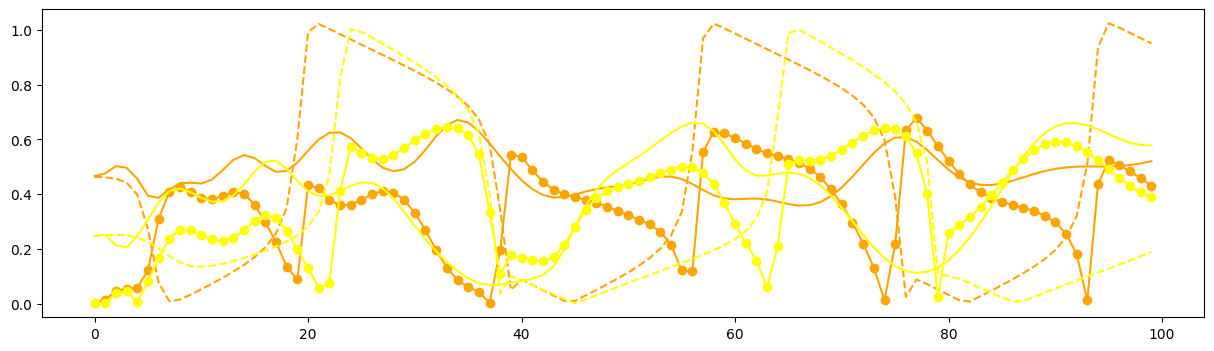

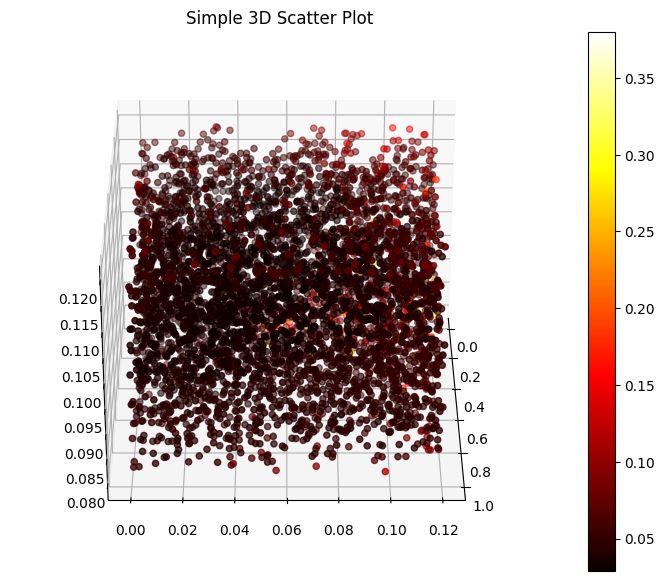

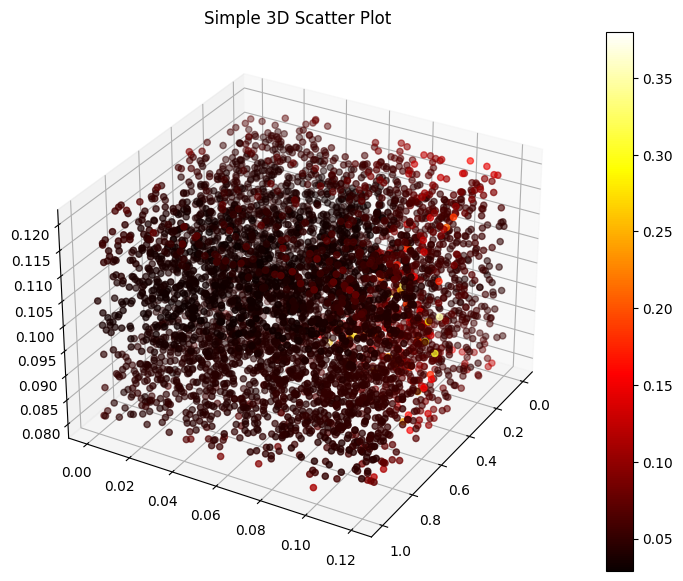

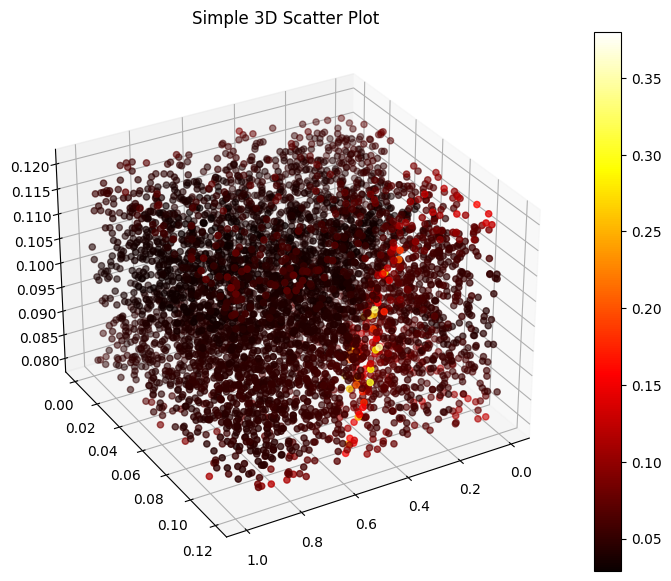

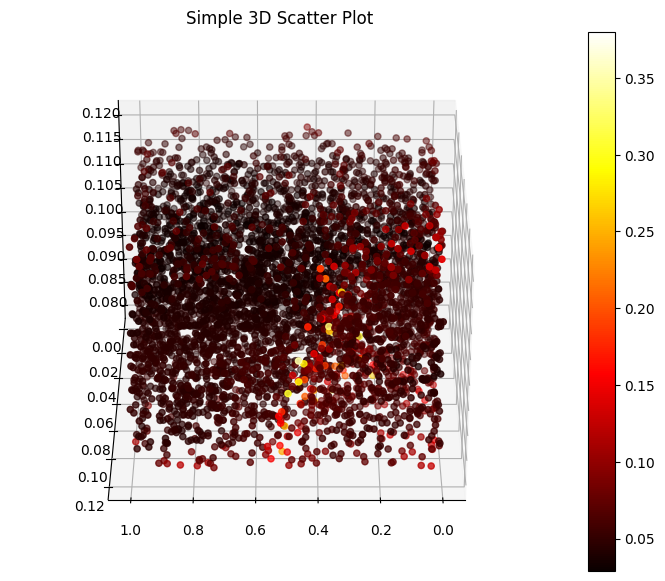

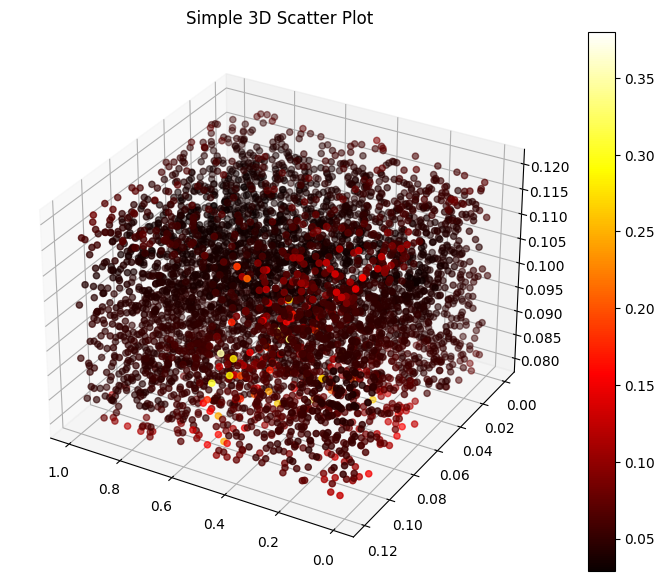

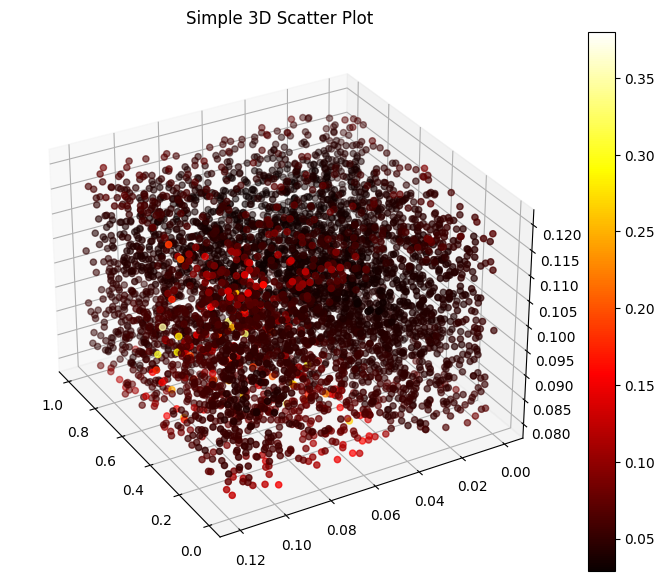

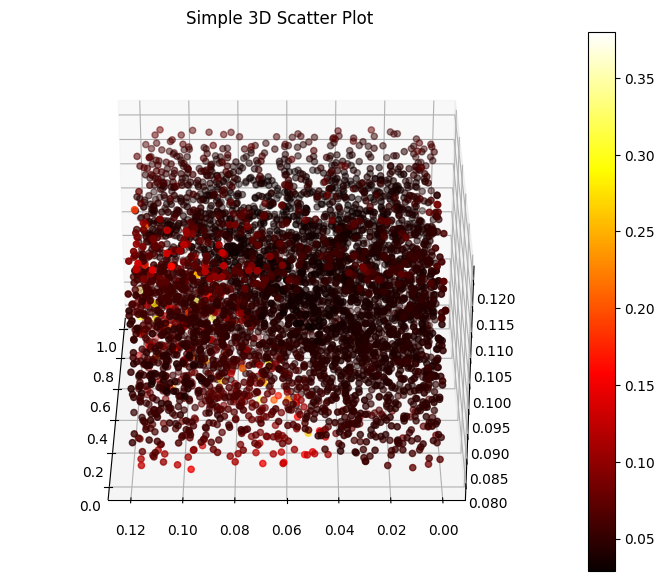

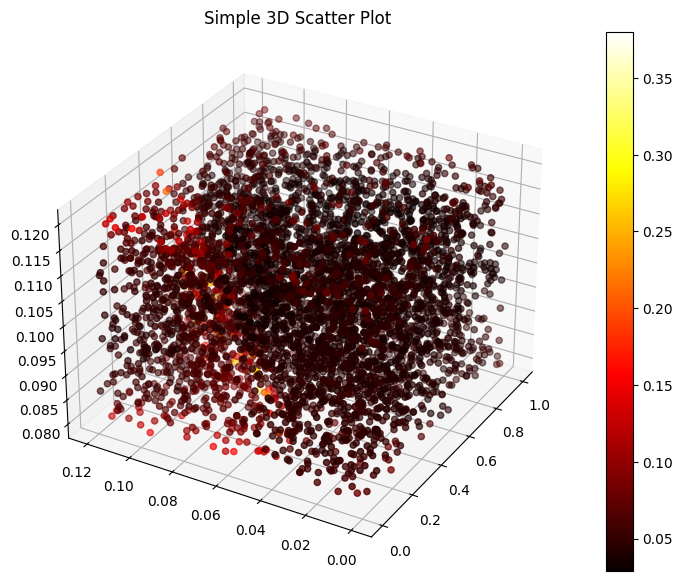

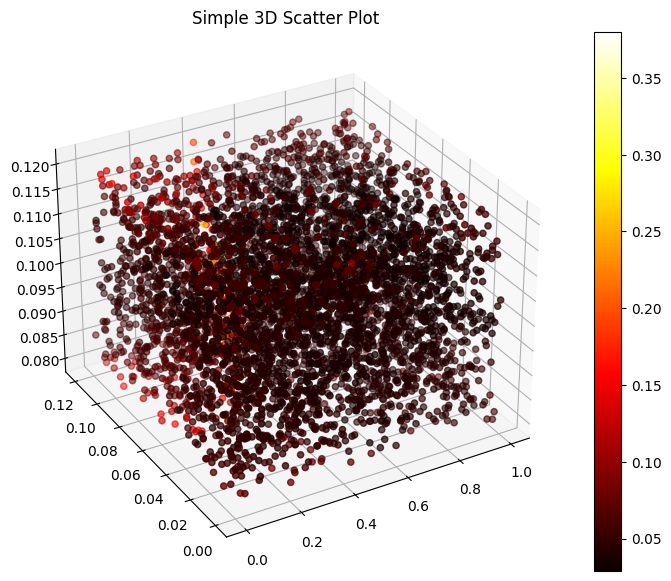

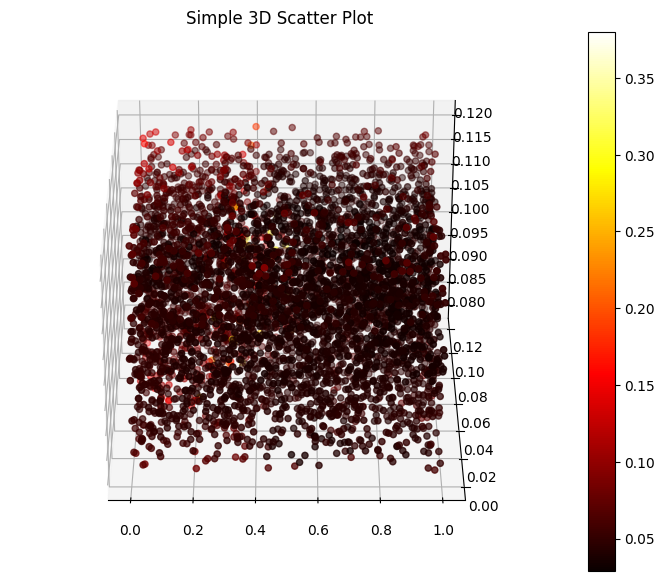

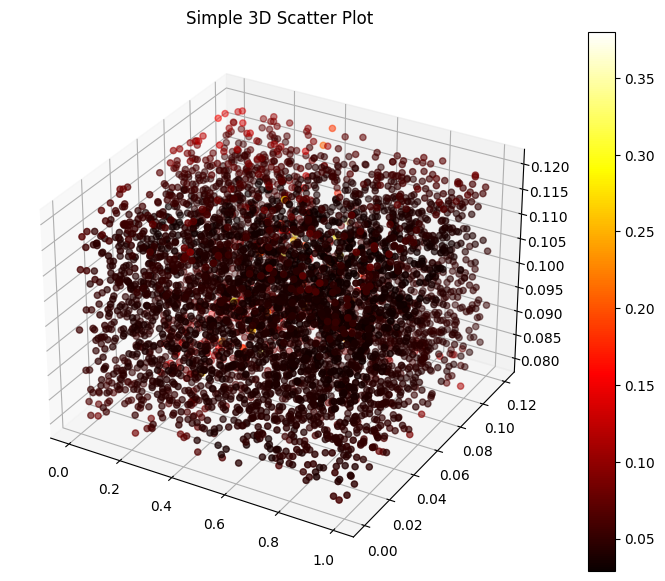

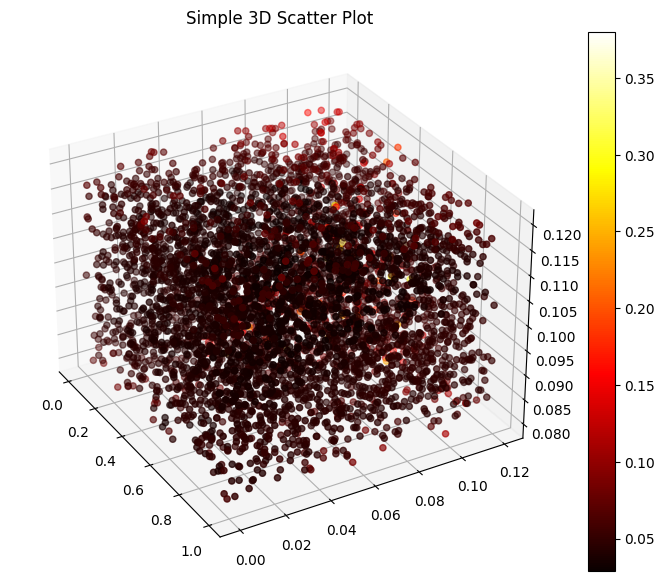

In [88]:
import numpy as np
import matplotlib.pyplot as plt

##mostra que ele cria uma cond inicial novamente para cada janela
import vtk
import matplotlib.pyplot as plt
import scipy  

import vtk
from vtk.util.numpy_support import vtk_to_numpy

import vtk
import matplotlib.pyplot as plt
import numpy as np
colors=["red","blue","green","orange","red","blue","green","yellow","orange"]
import vtk
from vtk.util.numpy_support import vtk_to_numpy
def read_vtp(path):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    data = reader.GetOutput().GetPointData()

    field_count = data.GetNumberOfArrays()
    return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}
def interpolate_2D( size, invar, *outvars):
        "Interpolate 2D outvar solutions onto a regular mesh"

        assert len(invar) == 2

        # define regular mesh to interpolate onto
        xs = [invar[k][:, 0] for k in invar]
        extent = (xs[0].min(), xs[0].max(), xs[1].min(), xs[1].max())
        xyi = np.meshgrid(
            np.linspace(extent[0], extent[1], size),
            np.linspace(extent[2], extent[3], size),
            indexing="ij",
        )

        # interpolate outvars onto mesh
        outvars_interp = []
        for outvar in outvars:
            outvar_interp = {}
            for k in outvar:
                outvar_interp[k] = scipy.interpolate.griddata(
                    (xs[0], xs[1]), outvar[k][:, 0], tuple(xyi)
                )
            outvars_interp.append(outvar_interp)

        return [extent] + outvars_interp

def all(invar, true_outvar, pred_outvar):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=pred_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=true_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=((true_outvar["x1"] -pred_outvar["x1"])**2)**0.5 ) 
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
#fig,a=plt.subplots(3, 3,sharex=True,sharey=True,figsize=(3 * 5, 3*5), dpi=100)

def call(invar, true_outvar, pred_outvar,d=0,F=plt.figure(figsize=(3 * 5, 4), dpi=100),label=""):
        extent, true_outvar, pred_outvar = interpolate_2D(
                200, invar, true_outvar, pred_outvar
            )
        ndim=2
        print(extent)

        dims = list(invar.keys())
        fs = []
        for k in pred_outvar:

            for i, (o, tag) in enumerate(
                zip(
                    [true_outvar[k], pred_outvar[k], ((true_outvar[k] - pred_outvar[k])**2)**(0.5) ],
                    ["True U", "Pred U", "Error"],
                )
            ):
                if (tag=="diff"):
                    to=o
                    to[0][0]=0
                print(i,d)
                if ndim == 1:
                    f.plot(invar[dims[0]][:, 0], o[:, 0])
                    f.xlabel(dims[0])
                elif ndim == 2:
                    f=F[i]
                    im=f.imshow(o.T, origin="lower",extent=(0,10,0,14),aspect=1)
                    
                    f.set_xlabel("T")
                    f.set_ylabel("K")
                    fig.colorbar(im,ax=f)
                    if(tag=="Error"):
                       
                        im.set_clim(0,0.1)
                    else :
                        im.set_clim(-.2,1)
               
                f.set_title(f"{tag}")
                
                ax=f
                if(i==0):
                    ax.annotate(label, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad,0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')
            #f.tight_layout()

            
def plot2(xlist,ylist,Z):

    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Filled Contours Plot')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    plt.show()
    def read_vtp(path):
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(path)
        reader.Update()
        data = reader.GetOutput().GetPointData()
        field_count = data.GetNumberOfArrays()
        return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}

def r(path):
    
    data=read_vtp(path)
    print(data)
    return data["t"],data["pred_x1"],data["K"],data["true_x1"],data["V"],data["U"],data["pred_w"],data["true_w"]
def plot(path):

    data=read_vtp(path)
    
    ks=np.unique(data["K"])
    o=find(data["K"],ks[9])
    i=find(data["V"][o],0.0)
    
    for a in range(0,len(i)):
        i[a]=i[a]+o[0]
    
  #  print(i)
   
    #print(([i]))
    t=np.unique(data["t"])
    
    plt.scatter(data['t'][i],data['true_x1'][i],"or")

    plt.plot(data['t'][i],data['pred_x1'][i],"b")

    plt.ylim(-1,1)

       
def find(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]



p=lambda s:'outputs/fhn3Ppred/window'+str(s)+'/validators/validator.vtp'
#plot('outputs/fhn2eqtwboth3C/initial_conditions/validators/validator.vtp')


t,x,k,tx,v,u,w,tw= r('outputs/fhn3Ppred/initial_conditions/validators/validator.vtp')
n_w=1
n=np.shape(x)[0]
T=np.zeros(n*n_w)
X=np.zeros(n*n_w)
K=np.zeros(n*n_w)
TX=np.zeros(n*n_w)
V=np.zeros(n*n_w)
U=np.zeros(n*n_w)
W=np.zeros(n*n_w)
TW=np.zeros(n*n_w)

T[0:n]=t
X[0:n]=x
K[0:n]=k
TX[0:n]=tx
V[0:n]=v
U[0:n]=u
W[0:n]=w
TW[0:n]=tw


for i in range(1,1):
    print(i)
    d=r(p(i))
    T[n*i:n*(i+1)]=d[0]
    X[n*i:n*(i+1)]=d[1]
    K[n*i:n*(i+1)]=d[2]
    TX[n*i:n*(i+1)]=d[3]
    V[n*i:n*(i+1)]=d[4]
    U[n*i:n*(i+1)]=d[5]
    
    W[n*i:n*(i+1)]=d[6]
    TW[n*i:n*(i+1)]=d[7]
    
    
E= ((X-TX)**2)**0.5

print(np.shape(E))
import operator

ae,m= max(enumerate(E), key=operator.itemgetter(1))
print("max e(rr region: ",K[ae],U[ae],V[ae],T[ae])
print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)

e=lambda x:np.expand_dims(x,axis=1)


nc=len(U)//len(np.unique(T))

print("a",nc)
d=0
print(np.shape(X))

pred_u= np.reshape(X, (nc,len(X)//nc))
true_u= np.reshape(TX, (nc,len(X)//nc))

ks,us,vs=np.reshape(K, (nc,len(X)//nc)),np.reshape(U, (nc,len(X)//nc)),np.reshape(V, (nc,len(X)//nc))

XU,YV,ZK,CE=[],[],[],[]
resetColors()
e_total=0
e_max=0
for i in range(0,nc):
    e=np.mean(np.abs(true_u[i]-pred_u[i]))
    if(e>e_max):
        e_max=e
    e_total=e_total+e

print("Erro medio",e_total/nc," erro max",e_max)
    

for i in range(0,nc):
    e=np.mean(np.abs(true_u[i]-pred_u[i]))
    if(e>0.9*e_max):
        c=colors.pop()
        plt.plot(np.abs(pred_u[i]),color=c)
        plt.plot(np.abs(true_u[i]),"--",color=c)
        plt.plot(np.abs(true_u[i]-pred_u[i]),"-o",color=c)

    
    if(e>=0*e_max):
       
        CE.append(np.mean(np.abs(true_u[i]-pred_u[i]) ))
        XU.append(us[i][0])
        YV.append(vs[i][0])
        ZK.append(ks[i][0])

plt.show()

from mpl_toolkits.mplot3d.proj3d import proj_transform



for angle in range(0, 360, 30):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Creating the scatter plot
    img = ax.scatter3D(XU, YV, ZK, c=CE,cmap=plt.hot())
    plt.title("Simple 3D Scatter Plot")
    fig.colorbar(img)
    
 

    ax.view_init(elev=30, azim=angle)
    ax.dist = 10  # Increase the distance of the plot from the viewer for a "zoomed out" effect

    plt.show()


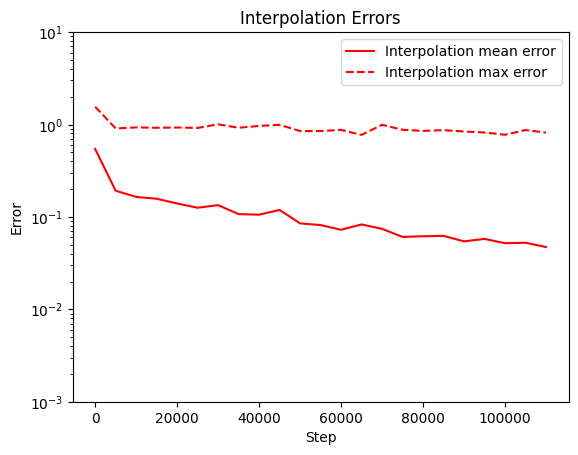

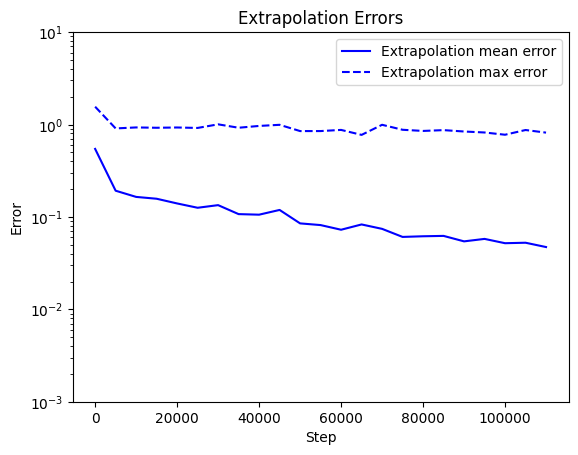

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Load CSV files
file_paths = [
    'outputs/fhn3Ppred/initial_conditions/monitors/Inter_error_mean.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Inter_error_max.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Extra_error_mean.csv',
    'outputs/fhn3Ppred/initial_conditions/monitors/Extra_error_max.csv'
]

data_list = [np.loadtxt(file_path, delimiter=',', skiprows=1) for file_path in file_paths]



# Separate data into steps and errors
steps_list = [data[:, 0] for data in data_list]
errors_list = [data[:, 1] for data in data_list]

# Plot Interpolation Errors
plt.figure()
plt.semilogy(steps_list[0], errors_list[0], "r", label="Interpolation mean error")
plt.semilogy(steps_list[0], errors_list[1], "r--", label="Interpolation max error")
plt.ylim(0.001, 10)  # Set appropriate y-axis limits
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Interpolation Errors')
plt.legend(loc="best")
plt.show()

# Plot Extrapolation Errors
plt.figure()
plt.semilogy(steps_list[0], errors_list[2], "b", label="Extrapolation mean error")
plt.semilogy(steps_list[0], errors_list[3], "b--", label="Extrapolation max error")
plt.ylim(0.001, 10)  # Set appropriate y-axis limits
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Extrapolation Errors')
plt.legend(loc="best")
plt.show()

In [82]:
from collections import deque
import matplotlib.pyplot as plt

# Create a deque of default colors
colors = deque(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def resetColors():
    colors = deque(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Display the initial queue of colors
print("Initial Queue of Colors:")
print(colors)

 

Initial Queue of Colors:
deque(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


'#e377c2'